In [ ]:
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image

In [ ]:
# Paths to the dataset
train_path = "/content/drive/MyDrive/archive (1)/sign_data/train"
test_path = "/content/drive/MyDrive/archive (1)/sign_data/test"

In [ ]:
# Create directories
os.makedirs("/content/Train/Fake", exist_ok=True)
os.makedirs("/content/Train/Real", exist_ok=True)
os.makedirs("/content/Test/Fake", exist_ok=True)
os.makedirs("/content/Test/Real", exist_ok=True)

In [ ]:
def copy_files(src_dir, dst_dir_fake, dst_dir_real):
    print(f"Checking files in {src_dir}")
    for item in os.listdir(src_dir):
        item_path = os.path.join(src_dir, item)
        if os.path.isfile(item_path):  # Check if it's a regular file
            if item.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check if it's a valid image file
                if item.lower().endswith("_forg.jpg") or item.lower().endswith("_forg.jpeg") or item.lower().endswith("_forg.png"):  # Check if filename ends with "_forg"
                    dst_file = os.path.join(dst_dir_fake, item)
                    print(f"Copying {item_path} to {dst_file}")
                    shutil.copy(item_path, dst_file)
                else:
                    dst_file = os.path.join(dst_dir_real, item)
                    print(f"Copying {item_path} to {dst_file}")
                    shutil.copy(item_path, dst_file)
            else:
                print(f"Skipping {item_path}, not a valid image file")
        elif os.path.isdir(item_path):  # Check if it's a directory
            if item.lower().endswith("_forg"):  # Check if directory name ends with "_forg"
                dst_dir = os.path.join(dst_dir_fake, item)  # Destination directory in the "Fake" folder
                print(f"Copying directory {item_path} to {dst_dir}")
                shutil.copytree(item_path, dst_dir, dirs_exist_ok=True)
            else:
                dst_dir = os.path.join(dst_dir_real, item)  # Destination directory in the "Real" folder
                print(f"Copying directory {item_path} to {dst_dir}")
                shutil.copytree(item_path, dst_dir, dirs_exist_ok=True)
        else:
            print(f"Skipping {item_path}, not a file or directory")


In [ ]:
# Example usage for the training dataset
train_src_dir = "/content/drive/MyDrive/archive (1)/sign_data/train"
train_dst_dir_fake = "/content/Train/Fake"
train_dst_dir_real = "/content/Train/Real"

# Copy files for training dataset
copy_files(train_src_dir, train_dst_dir_fake, train_dst_dir_real)

Checking files in /content/drive/MyDrive/archive (1)/sign_data/train
Copying directory /content/drive/MyDrive/archive (1)/sign_data/train/066_forg to /content/Train/Fake/066_forg
Copying directory /content/drive/MyDrive/archive (1)/sign_data/train/068 to /content/Train/Real/068
Copying directory /content/drive/MyDrive/archive (1)/sign_data/train/069 to /content/Train/Real/069
Copying directory /content/drive/MyDrive/archive (1)/sign_data/train/067 to /content/Train/Real/067
Copying directory /content/drive/MyDrive/archive (1)/sign_data/train/067_forg to /content/Train/Fake/067_forg
Copying directory /content/drive/MyDrive/archive (1)/sign_data/train/066 to /content/Train/Real/066
Copying directory /content/drive/MyDrive/archive (1)/sign_data/train/068_forg to /content/Train/Fake/068_forg
Copying directory /content/drive/MyDrive/archive (1)/sign_data/train/069_forg to /content/Train/Fake/069_forg
Copying directory /content/drive/MyDrive/archive (1)/sign_data/train/064_forg to /content/T

In [ ]:
# Example usage for the testing dataset
test_src_dir = "/content/drive/MyDrive/archive (1)/sign_data/test"
test_dst_dir_fake = "/content/Test/Fake"
test_dst_dir_real = "/content/Test/Real"

# Copy files for testing dataset
copy_files(test_src_dir, test_dst_dir_fake, test_dst_dir_real)

Checking files in /content/drive/MyDrive/archive (1)/sign_data/test
Copying directory /content/drive/MyDrive/archive (1)/sign_data/test/069_forg to /content/Test/Fake/069_forg
Copying directory /content/drive/MyDrive/archive (1)/sign_data/test/069 to /content/Test/Real/069
Copying directory /content/drive/MyDrive/archive (1)/sign_data/test/068 to /content/Test/Real/068
Copying directory /content/drive/MyDrive/archive (1)/sign_data/test/068_forg to /content/Test/Fake/068_forg
Copying directory /content/drive/MyDrive/archive (1)/sign_data/test/067 to /content/Test/Real/067
Copying directory /content/drive/MyDrive/archive (1)/sign_data/test/067_forg to /content/Test/Fake/067_forg
Copying directory /content/drive/MyDrive/archive (1)/sign_data/test/064 to /content/Test/Real/064
Copying directory /content/drive/MyDrive/archive (1)/sign_data/test/063 to /content/Test/Real/063
Copying directory /content/drive/MyDrive/archive (1)/sign_data/test/065 to /content/Test/Real/065
Copying directory /c

In [ ]:
# Check if directories contain images
train_fake_images = os.listdir("/content/Train/Fake")
train_real_images = os.listdir("/content/Train/Real")
test_fake_images = os.listdir("/content/Test/Fake")
test_real_images = os.listdir("/content/Test/Real")

# Print the contents of each directory
print(f"Train/Fake: {train_fake_images}")
print(f"Train/Real: {train_real_images}")
print(f"Test/Fake: {test_fake_images}")
print(f"Test/Real: {test_real_images}")

if len(train_fake_images) == 0 or len(train_real_images) == 0 or len(test_fake_images) == 0 or len(test_real_images) == 0:
    raise ValueError("One of the directories is empty. Please check the paths and ensure images are correctly copied.")

Train/Fake: ['044_forg', '030_forg', '061_forg', '027_forg', '053_forg', '006_forg', '035_forg', '067_forg', '023_forg', '054_forg', '047_forg', '049_forg', '012_forg', '020_forg', '002_forg', '051_forg', '066_forg', '058_forg', '022_forg', '009_forg', '062_forg', '017_forg', '029_forg', '048_forg', '015_forg', '019_forg', '037_forg', '060_forg', '063_forg', '045_forg', '004_forg', '001_forg', '055_forg', '040_forg', '042_forg', '032_forg', '046_forg', '033_forg', '050_forg', '052_forg', '025_forg', '034_forg', '018_forg', '038_forg', '016_forg', '021_forg', '069_forg', '031_forg', '003_forg', '041_forg', '064_forg', '039_forg', '065_forg', '014_forg', '043_forg', '056_forg', '026_forg', '068_forg', '013_forg', '028_forg', '024_forg', '059_forg', '057_forg', '036_forg']
Train/Real: ['050', '065', '026', '054', '002', '046', '045', '023', '068', '048', '029', '064', '056', '018', '003', '037', '016', '001', '041', '043', '004', '066', '017', '052', '024', '067', '063', '019', '057', '01

In [ ]:
# Directories for training and testing
train_dir = "/content/Train"
test_dir = "/content/Test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Apply augmentation to the generator
train_generator_augmented = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1649 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


In [ ]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(130, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(426, activation='relu'),
    Dropout(0.5),
    Dense(300, activation='relu'),  # Adjusted dense layer size
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [ ]:
# Check the number of samples
num_train_samples = train_generator_augmented.samples
num_test_samples = test_generator.samples

# Calculate steps_per_epoch and validation_steps based on the number of samples
steps_per_epoch = num_train_samples // 64
validation_steps = num_test_samples // 64

# Ensure steps_per_epoch and validation_steps are at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)

print(f'Steps per epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator_augmented,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=2
)

Steps per epoch: 25
Validation steps: 7
Epoch 1/30
25/25 - 51s - 2s/step - accuracy: 0.9563 - loss: 0.1166 - val_accuracy: 0.6786 - val_loss: 0.5804
Epoch 2/30
25/25 - 46s - 2s/step - accuracy: 0.9503 - loss: 0.1294 - val_accuracy: 0.8795 - val_loss: 0.2069
Epoch 3/30
25/25 - 3s - 130ms/step - accuracy: 0.9219 - loss: 0.2015 - val_accuracy: 0.9231 - val_loss: 0.1746
Epoch 4/30
25/25 - 93s - 4s/step - accuracy: 0.9625 - loss: 0.1215 - val_accuracy: 0.8438 - val_loss: 0.2870
Epoch 5/30
25/25 - 46s - 2s/step - accuracy: 0.9452 - loss: 0.1214 - val_accuracy: 0.8750 - val_loss: 0.2267
Epoch 6/30
25/25 - 31s - 1s/step - accuracy: 0.9688 - loss: 0.1197 - val_accuracy: 0.8846 - val_loss: 0.1957
Epoch 7/30
25/25 - 50s - 2s/step - accuracy: 0.9567 - loss: 0.1147 - val_accuracy: 0.9911 - val_loss: 0.0243
Epoch 8/30
25/25 - 46s - 2s/step - accuracy: 0.9525 - loss: 0.1407 - val_accuracy: 0.7946 - val_loss: 0.3668
Epoch 9/30
25/25 - 5s - 211ms/step - accuracy: 0.9531 - loss: 0.1275 - val_accuracy: 0

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 606ms/step - accuracy: 0.9828 - loss: 0.0333
Test Accuracy: 99.20%
Test Loss: 2.36%


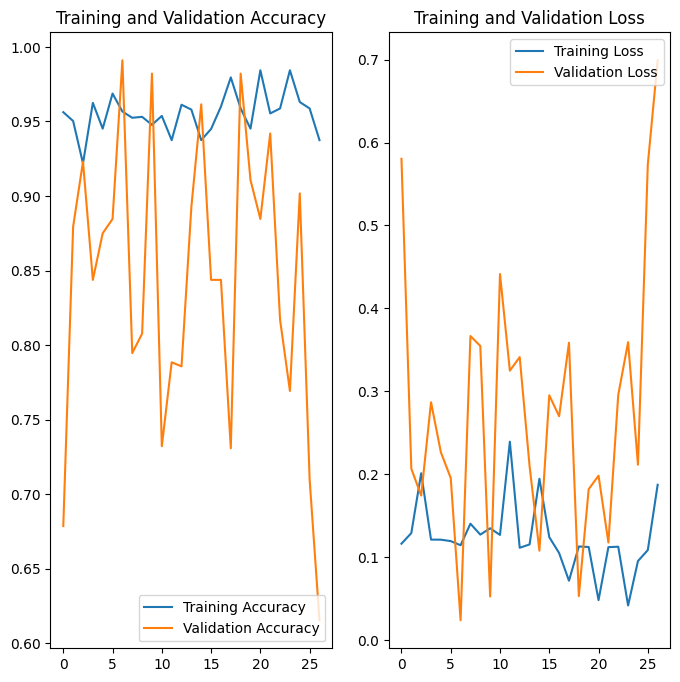

In [ ]:
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('forg.h5')

In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model('forg.h5')

# Verify the loaded model architecture
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 100)         │          57,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 130)         │         117,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 130)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6370)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,261,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 426)                 │         218,538 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 426)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 300)                 │         128,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             301 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,803,115 (14.51 MB)

 Trainable params: 3,803,113 (14.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

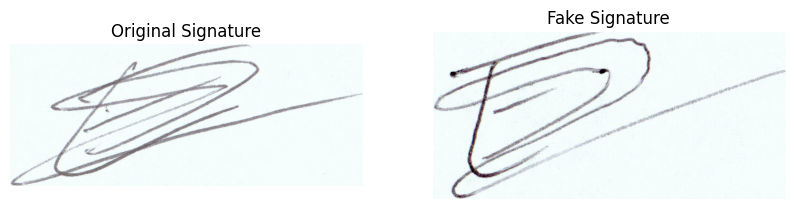

In [ ]:
# Function to display an image
def display_image(image_path, title):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

# Define directories
real_dir = '/content/Train/Real'
fake_dir = '/content/Train/Fake'

# Get the list of original and fake filenames
real_files = [f for f in os.listdir(real_dir) if os.path.isdir(os.path.join(real_dir, f))]
fake_files = [f for f in os.listdir(fake_dir) if f.endswith('_forg') and os.path.isdir(os.path.join(fake_dir, f))]

# Extract base names for matching
real_base_names = set(real_files)
fake_base_names = set(f.split('_forg')[0] for f in fake_files)

# Find common base names
common_names = real_base_names & fake_base_names

if not common_names:
    raise ValueError("No matching original and fake signature pairs found.")

# Randomly select a common name
selected_name = random.choice(list(common_names))

# Get paths for the selected original and fake images
real_image_dir = os.path.join(real_dir, selected_name)
fake_image_dir = os.path.join(fake_dir, selected_name + '_forg')

# Select a random image from each directory
real_image_path = random.choice([os.path.join(real_image_dir, f) for f in os.listdir(real_image_dir) if os.path.isfile(os.path.join(real_image_dir, f))])
fake_image_path = random.choice([os.path.join(fake_image_dir, f) for f in os.listdir(fake_image_dir) if os.path.isfile(os.path.join(fake_image_dir, f))])

# Plot the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
display_image(real_image_path, 'Original Signature')

plt.subplot(1, 2, 2)
display_image(fake_image_path, 'Fake Signature')

plt.show()


(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


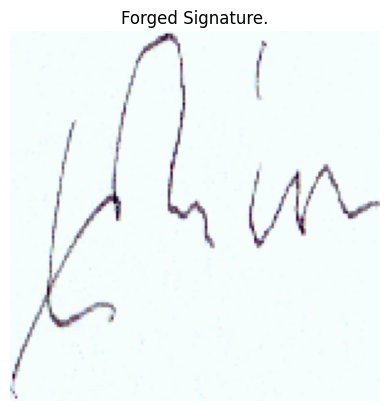

In [ ]:
# Load the saved model
model = tf.keras.models.load_model('forg.h5')

# Import the image module from keras.preprocessing
from tensorflow.keras.preprocessing import image

# Function to preprocess the image
def preprocess_image(img_path, target_size=(150, 150)): # Change to the original training input size
    # Check if the provided path is a directory
    if os.path.isdir(img_path):
        # If it's a directory, list the files inside
        files = os.listdir(img_path)
        # Select the first image file (you might want to adjust this based on your directory structure)
        if files:
            img_path = os.path.join(img_path, files[0])
        else:
            raise ValueError("The provided directory is empty.")

    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array, img

# Example image path (replace with your actual image path)
img_path = '/content/drive/MyDrive/archive (1)/sign_data/train/001_forg'

# Preprocess the image
img_array, img = preprocess_image(img_path)

# Print the shape of the preprocessed image to verify
print(img_array.shape)

# Make predictions
prediction = model.predict(img_array)

# Since it's a binary classification (real or fake), we use a threshold of 0.5
if prediction < 0.5:
    result = "Forged"
else:
    result = "Original"

# Display the image with the classification result
plt.imshow(img)
plt.title(f'{result} Signature.')
plt.axis('off')  # Hide the axis
plt.show()


RESNET

In [ ]:
# Define the model
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False, input_shape=(64, 64, 3), pooling='avg', weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(435, activation='relu'))
resnet_model.add(Dense(365, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Define the generators with the correct target size
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_dir = '/content/Train'
test_dir = '/content/Test'

train_generator_augmented = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=64,
    class_mode='binary'
)

# Calculate steps_per_epoch and validation_steps based on the size of your dataset
steps_per_epoch = train_generator_augmented.samples // train_generator_augmented.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

# Ensure steps_per_epoch and validation_steps are at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model
history = resnet_model.fit(
    train_generator_augmented,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=2
)

Found 1649 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/50
25/25 - 50s - 2s/step - accuracy: 0.5495 - loss: 0.6946 - val_accuracy: 0.5871 - val_loss: 0.6705
Epoch 2/50
25/25 - 2s - 73ms/step - accuracy: 0.5469 - loss: 0.7040 - val_accuracy: 0.6346 - val_loss: 0.6587
Epoch 3/50
25/25 - 77s - 3s/step - accuracy: 0.5685 - loss: 0.6787 - val_accuracy: 0.6250 - val_loss: 0.6674
Epoch 4/50
25/25 - 2s - 64ms/step - accuracy: 0.6250 - loss: 0.6647 - val_accuracy: 0.6346 - val_loss: 0.6605
Epoch 5/50
25/25 - 39s - 2s/step - accuracy: 0.6202 - loss: 0.6516 - val_accuracy: 0.6183 - val_loss: 0.6407
Epoch 6/50
25/25 - 2s - 86ms/step - accuracy: 0.5781 - loss: 0.6626 - val_accuracy: 0.6154 - val_loss: 0.6347
Epoch 7/50
25/25 - 36s - 1s/step - accuracy: 0.6353 - loss: 0.6323 - val_accuracy: 0.5893 - val_loss: 0.6512
Epoch 8/50
25/25 - 2s - 62ms/step - accuracy: 0.6562 - loss: 0.5903 - val_accuracy: 0.4615 - val_loss: 0.8034
Epoch 9/50
25/25 - 39s - 2s/step - accura

In [ ]:
loss, accuracy = resnet_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 887ms/step - accuracy: 0.8083 - loss: 0.4407
Test Accuracy: 80.60%
Test Loss: 44.99%


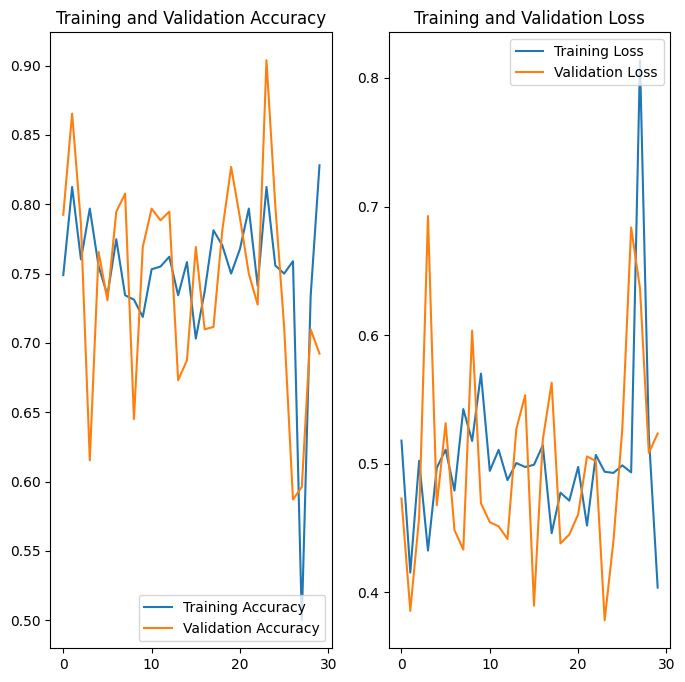

In [ ]:
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save the resnet model
resnet_model.save('resnet_model.h5')

In [ ]:
resnet_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 435)                 │         223,155 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 365)                 │         159,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 1)                   │             366 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,882,961 (106.37 MB)

 Trainable params: 1,431,749 (5.46 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,863,500 (10.92 MB)

VGG16

In [ ]:
# Define the VGG16 model
vgg16_model = Sequential()
pretrained_vgg16 = tf.keras.applications.VGG16(include_top=False, input_shape=(64, 64, 3), pooling='avg', weights='imagenet')

for layer in pretrained_vgg16.layers:
    layer.trainable = False

vgg16_model.add(pretrained_vgg16)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(450, activation='relu'))
vgg16_model.add(Dense(260, activation='relu'))
vgg16_model.add(Dense(1, activation='sigmoid'))
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the generators with the correct target size
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator_augmented = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=64,
    class_mode='binary'
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 1649 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Calculate steps_per_epoch and validation_steps based on the size of your dataset
steps_per_epoch = train_generator_augmented.samples // train_generator_augmented.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

# Ensure steps_per_epoch and validation_steps are at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the VGG16 model
history_vgg16 = vgg16_model.fit(
    train_generator_augmented,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/30
25/25 - 100s - 4s/step - accuracy: 0.8795 - loss: 0.2885 - val_accuracy: 0.9018 - val_loss: 0.2326
Epoch 2/30
25/25 - 6s - 259ms/step - accuracy: 0.9062 - loss: 0.2426 - val_accuracy: 0.9038 - val_loss: 0.2583
Epoch 3/30
25/25 - 99s - 4s/step - accuracy: 0.9104 - loss: 0.2290 - val_accuracy: 0.9263 - val_loss: 0.1936
Epoch 4/30
25/25 - 6s - 229ms/step - accuracy: 0.8906 - loss: 0.2329 - val_accuracy: 0.9038 - val_loss: 0.2108
Epoch 5/30
25/25 - 136s - 5s/step - accuracy: 0.9091 - loss: 0.2149 - val_accuracy: 0.8839 - val_loss: 0.2769
Epoch 6/30
25/25 - 18s - 733ms/step - accuracy: 0.8750 - loss: 0.2625 - val_accuracy: 0.8846 - val_loss: 0.2726
Epoch 7/30
25/25 - 100s - 4s/step - accuracy: 0.9028 - loss: 0.2303 - val_accuracy: 0.9241 - val_loss: 0.1844
Epoch 8/30
25/25 - 5s - 182ms/step - accuracy: 0.9219 - loss: 0.1848 - val_accuracy: 0.9038 - val_loss: 0.2689
Epoch 9/30
25/25 - 98s - 4s/step - accuracy: 0.9312 - loss: 0.1754 - val_accuracy: 0.9576 - val_loss: 0.1465
Epoch 1

In [ ]:
loss, accuracy = vgg16_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.9904 - loss: 0.0624
Test Accuracy: 98.60%
Test Loss: 7.59%


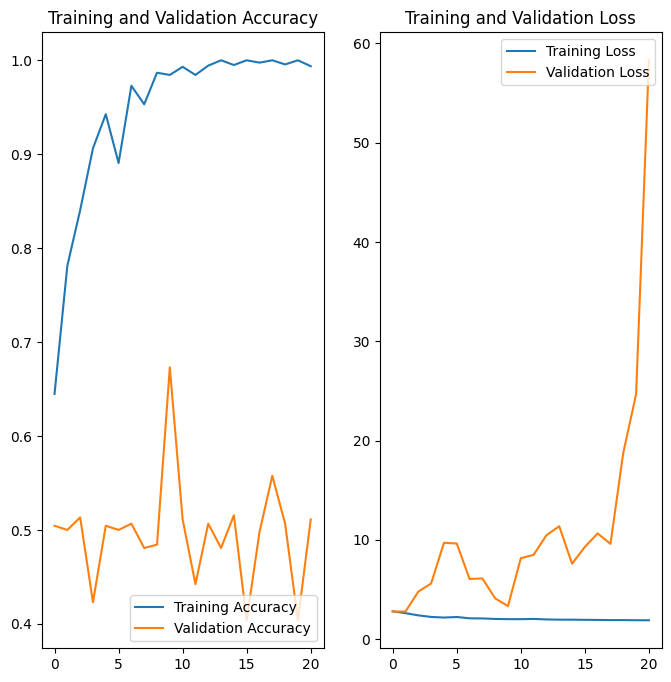

In [ ]:
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save the VGG16 model
vgg16_model.save('vgg16_model.h5')

In [ ]:
vgg16_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 450)                 │         230,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 260)                 │         117,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             261 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,547,771 (63.12 MB)

 Trainable params: 611,027 (2.33 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,222,056 (4.66 MB)

VGG19

In [ ]:
# Define the VGG19 model
vgg19_model = Sequential()
pretrained_vgg19 = tf.keras.applications.VGG19(include_top=False, input_shape=(64, 64, 3), pooling='avg', weights='imagenet')

for layer in pretrained_vgg19.layers:
    layer.trainable = False

vgg19_model.add(pretrained_vgg19)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(512, activation='relu'))
vgg19_model.add(Dense(455, activation='relu'))
vgg19_model.add(Dense(250, activation='relu'))
vgg19_model.add(Dense(1, activation='sigmoid'))
vgg19_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the generators with the correct target size
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator_augmented = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=64,
    class_mode='binary'
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 1649 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Calculate steps_per_epoch and validation_steps based on the size of your dataset
steps_per_epoch = train_generator_augmented.samples // train_generator_augmented.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

# Ensure steps_per_epoch and validation_steps are at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the VGG19 model
history_vgg19 = vgg19_model.fit(
    train_generator_augmented,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/30
25/25 - 142s - 6s/step - accuracy: 0.9445 - loss: 0.1340 - val_accuracy: 0.9241 - val_loss: 0.1509
Epoch 2/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 - 7s - 295ms/step - accuracy: 0.8750 - loss: 0.2562 - val_accuracy: 0.9615 - val_loss: 0.1149
Epoch 3/30
25/25 - 175s - 7s/step - accuracy: 0.9489 - loss: 0.1299 - val_accuracy: 0.9598 - val_loss: 0.1162
Epoch 4/30
25/25 - 13s - 540ms/step - accuracy: 0.9844 - loss: 0.0743 - val_accuracy: 0.9231 - val_loss: 0.2036
Epoch 5/30
25/25 - 127s - 5s/step - accuracy: 0.9344 - loss: 0.1566 - val_accuracy: 0.9643 - val_loss: 0.1180
Epoch 6/30
25/25 - 8s - 312ms/step - accuracy: 0.8906 - loss: 0.1697 - val_accuracy: 0.9423 - val_loss: 0.1336
Epoch 7/30
25/25 - 121s - 5s/step - accuracy: 0.9237 - loss: 0.1791 - val_accuracy: 0.9509 - val_loss: 0.1240
Epoch 8/30
25/25 - 6s - 225ms/step - accuracy: 0.9219 - loss: 0.1756 - val_accuracy: 0.8654 - val_loss: 0.3502
Epoch 9/30
25/25 - 137s - 5s/step - accuracy: 0.9274 - loss: 0.1754 - val_accuracy: 0.9397 - val_loss: 0.1152
Epoch 10/30
25/25 - 7s - 293ms/step - accuracy: 0.9688 - loss: 0.0853 - val_accuracy: 0.9615 - val_loss: 0.0949
Epoch 11/30
25

In [ ]:
loss, accuracy = vgg19_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.9846 - loss: 0.0441
Test Accuracy: 98.20%
Test Loss: 4.57%


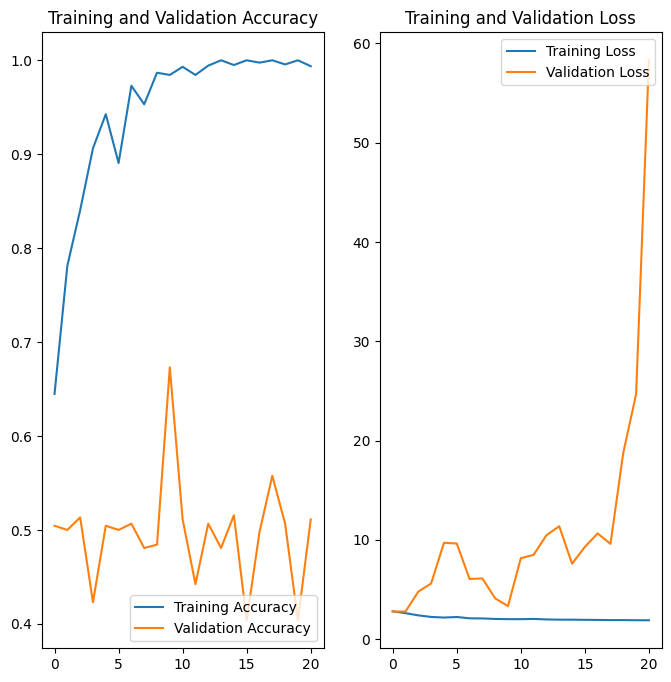

In [ ]:
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save the VGG19 model
vgg19_model.save('vgg19_model.h5')

In [ ]:
vgg19_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 512)                 │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 455)                 │         233,415 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 250)                 │         114,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,855,352 (83.37 MB)

 Trainable params: 610,322 (2.33 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 1,220,646 (4.66 MB)